In [31]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

path = "/home/bule/projects/Dice/workspace/data/eyes2/empty"
images_still = []
for filename in os.listdir(path):
    img = cv2.imread(os.path.join(path, filename))
    if img is not None:
        images_still.append(img)
        
path = "/home/bule/projects/Dice/workspace/data/eyes2/empty"

images_not_still = []

path = "/home/bule/projects/Dice/workspace/data/eyes2/rolling"
for filename in os.listdir(path):
    img = cv2.imread(os.path.join(path, filename))
    if img is not None:
        images_not_still.append(img)        
path = "/home/bule/projects/Dice/workspace/data/eyes2/still"
for filename in os.listdir(path):
    img = cv2.imread(os.path.join(path, filename))
    if img is not None:
        images_not_still.append(img)             
        
gray_images_still = [cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in images_still]
gray_images_not_still = [cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in images_not_still]

In [39]:
med_still =[(np.max(im)-np.median(im))/255 for im in gray_images_still]
med_not_still =[(np.max(im)-np.median(im))/255 for im in gray_images_not_still]

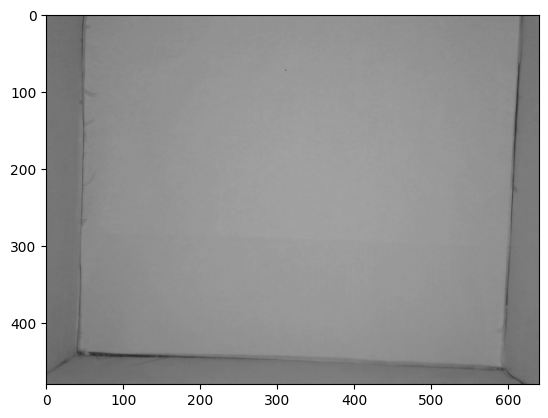

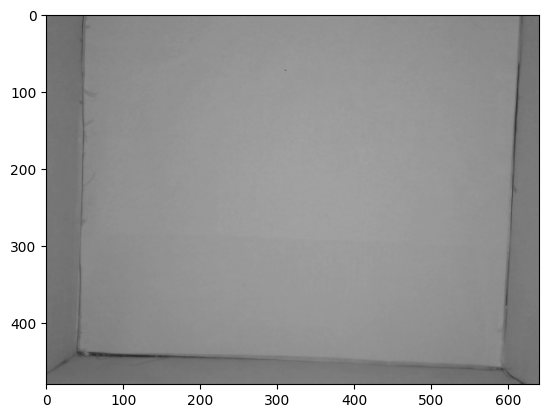

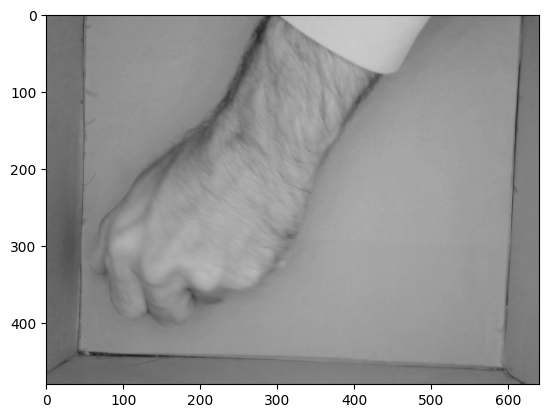

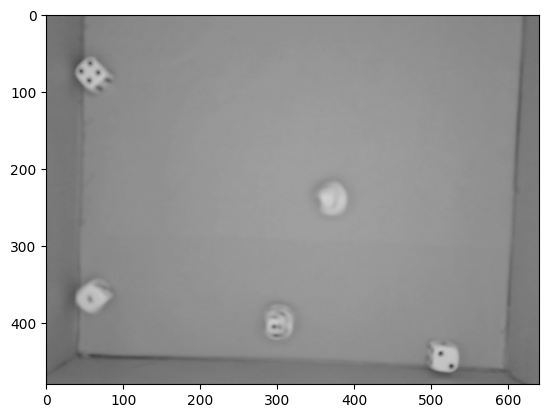

In [35]:
for img in gray_images_still[:2]:
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()
    
for img in gray_images_not_still[:2]:
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

/tmp/ipykernel_961394/3111220089.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(med_still, hist=False, rug=True)
/tmp/ipykernel_961394/3111220089.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(med_not_still, hist=False, rug=True)


<Axes: ylabel='Density'>

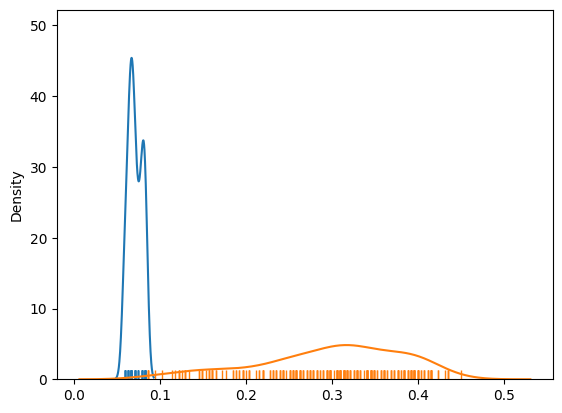

In [42]:
# Scores for moving and empty images
import seaborn as sns
sns.distplot(med_still, hist=False, rug=True)
sns.distplot(med_not_still, hist=False, rug=True)